<a href="https://colab.research.google.com/github/Mennakurdi/fraud_detection_project/blob/main/notebooks/part%202%201_data_exploration_and_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
bene_agg = bene.groupby('BeneID').agg({
    'NoOfMonths_PartACov':'mean',
    'NoOfMonths_PartBCov':'mean',
    'IPAnnualReimbursementAmt':'mean',
    'OPAnnualReimbursementAmt':'mean',
    'IPAnnualDeductibleAmt':'mean',
    'OPAnnualDeductibleAmt':'mean'
}).reset_index()
display(bene_agg.head())

,BeneID,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualDeductibleAmt
0,BENE11001,12.0,12.0,36000.0,60.0,3204.0,70.0
1,BENE11002,12.0,12.0,0.0,30.0,0.0,50.0
2,BENE11003,12.0,12.0,0.0,90.0,0.0,40.0
3,BENE11004,12.0,12.0,0.0,1810.0,0.0,760.0
4,BENE11005,12.0,12.0,0.0,1790.0,0.0,1200.0


In [18]:
provider_df = labels.copy()

provider_df = provider_df.merge(inpatient_agg, on='Provider', how='left')
provider_df = provider_df.merge(outpatient_agg, on='Provider', how='left')



In [19]:
provider_df.fillna(0, inplace=True)
if 'PotentialFraud' in provider_df.columns:
    provider_df['Fraud'] = provider_df['PotentialFraud'].map({'Yes':1, 'No':0})
    provider_df.drop(columns=['PotentialFraud'], inplace=True)

provider_df.head()
provider_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Provider                  5410 non-null   object 
 1   InscClaimAmtReimbursed_x  5410 non-null   float64
 2   DeductibleAmtPaid_x       5410 non-null   float64
 3   ClaimDuration_x           5410 non-null   float64
 4   InpatientClaimCount       5410 non-null   float64
 5   InscClaimAmtReimbursed_y  5410 non-null   float64
 6   DeductibleAmtPaid_y       5410 non-null   float64
 7   ClaimDuration_y           5410 non-null   float64
 8   OutpatientClaimCount      5410 non-null   float64
 9   Fraud                     5410 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 422.8+ KB


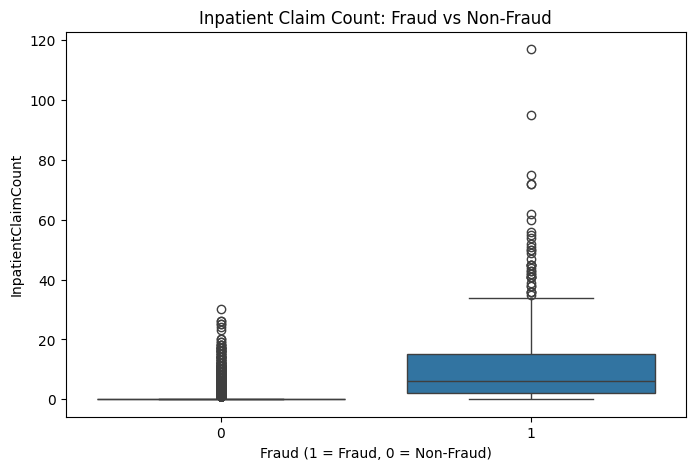

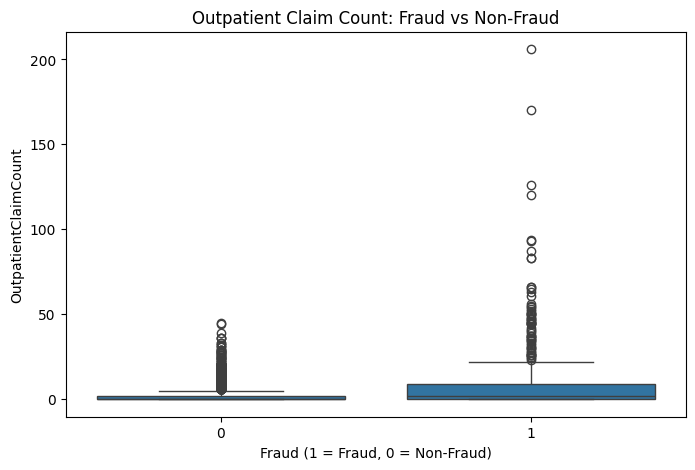

In [20]:
# ============================================================
# Cell 14 – Fraud vs Non-Fraud: Claim Counts
# ============================================================
plt.figure(figsize=(8,5))
sns.boxplot(x='Fraud', y='InpatientClaimCount', data=provider_df)
plt.title("Inpatient Claim Count: Fraud vs Non-Fraud")
plt.xlabel("Fraud (1 = Fraud, 0 = Non-Fraud)")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Fraud', y='OutpatientClaimCount', data=provider_df)
plt.title("Outpatient Claim Count: Fraud vs Non-Fraud")
plt.xlabel("Fraud (1 = Fraud, 0 = Non-Fraud)")
plt.show()


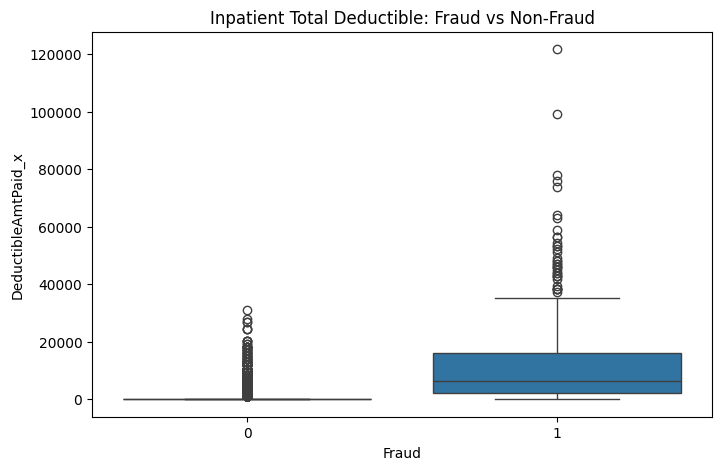

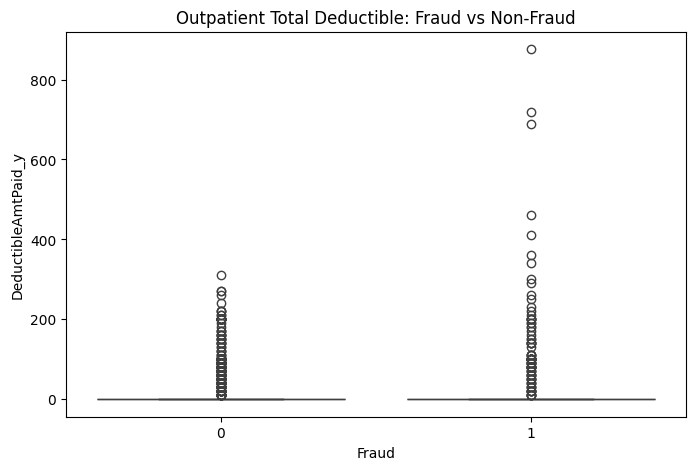

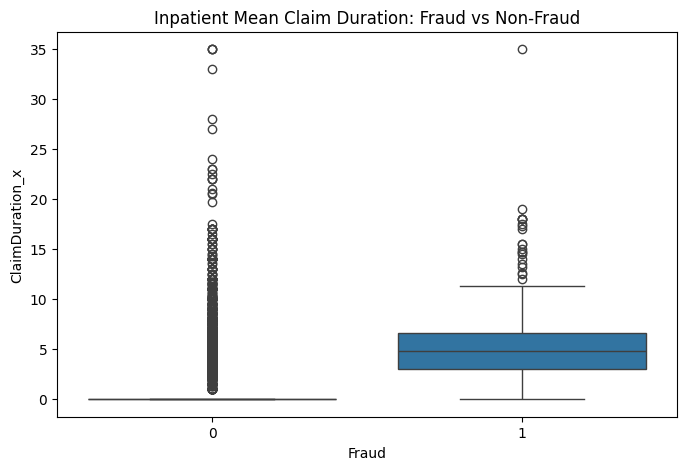

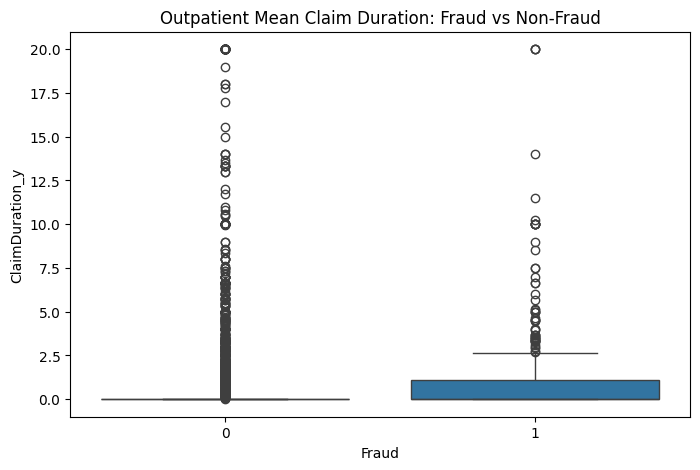

In [21]:
# ============================================================
# Cell 15 – Fraud vs Non-Fraud: Deductibles & Durations
# ============================================================
plt.figure(figsize=(8,5))
sns.boxplot(x='Fraud', y='DeductibleAmtPaid_x', data=provider_df)
plt.title("Inpatient Total Deductible: Fraud vs Non-Fraud")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Fraud', y='DeductibleAmtPaid_y', data=provider_df)
plt.title("Outpatient Total Deductible: Fraud vs Non-Fraud")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Fraud', y='ClaimDuration_x', data=provider_df)
plt.title("Inpatient Mean Claim Duration: Fraud vs Non-Fraud")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Fraud', y='ClaimDuration_y', data=provider_df)
plt.title("Outpatient Mean Claim Duration: Fraud vs Non-Fraud")
plt.show()

In [22]:
print("Providers in inpatient: ", inpatient['Provider'].nunique())
print("Providers in outpatient:", outpatient['Provider'].nunique())
print("Providers in labels:    ", labels['Provider'].nunique())

print("Overlap between inpatient & labels:",
      len(set(inpatient['Provider']).intersection(set(labels['Provider']))))

print("Overlap between outpatient & labels:",
      len(set(outpatient['Provider']).intersection(set(labels['Provider']))))


Providers in inpatient:  1626
Providers in outpatient: 2624
Providers in labels:     5410
Overlap between inpatient & labels: 1626
Overlap between outpatient & labels: 2624


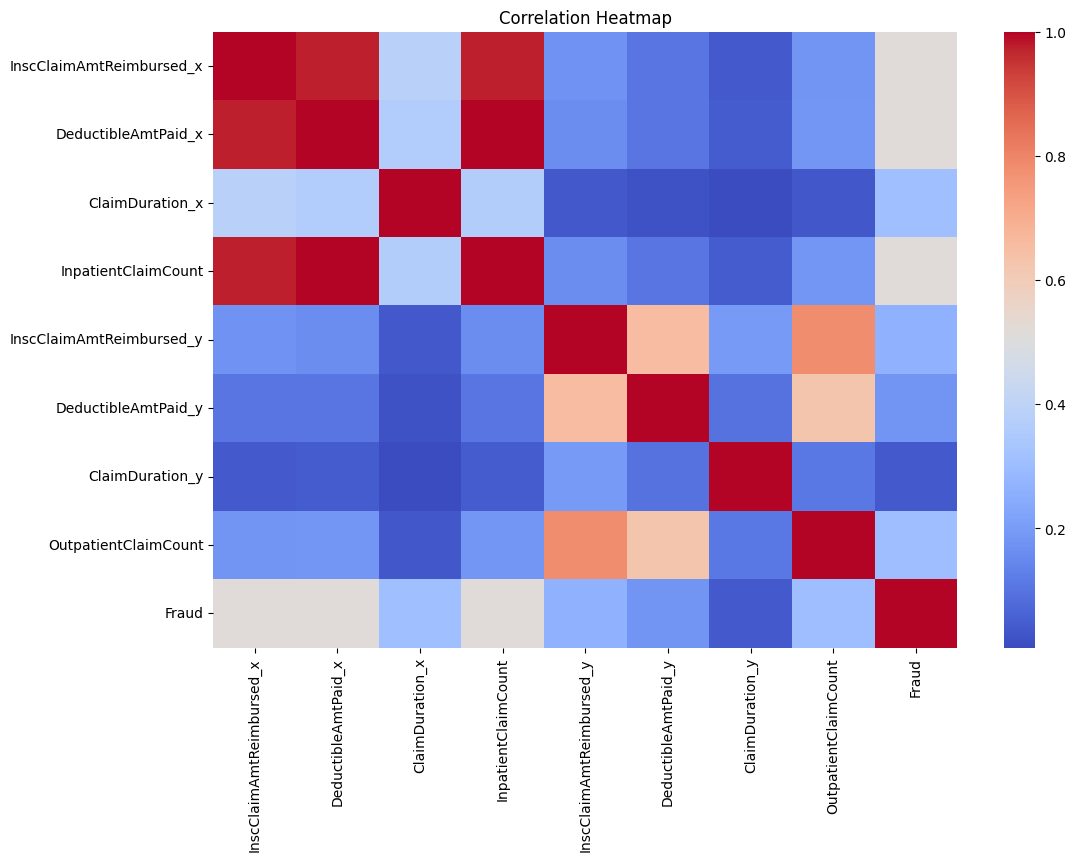

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(provider_df.drop('Provider', axis=1).corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [24]:
print(provider_df.head())
print(provider_df.info())

# Save clean dataset for Notebook 2
provider_df.to_csv('/content/provider_dataset_cleaned.csv', index=False)

   Provider  InscClaimAmtReimbursed_x  DeductibleAmtPaid_x  ClaimDuration_x  \
0  PRV51001                   48000.0               2136.0         3.000000   
1  PRV51003                  120000.0              20292.0         5.210526   
2  PRV51004                       0.0                  0.0         0.000000   
3  PRV51005                       0.0                  0.0         0.000000   
4  PRV51007                    6000.0               1068.0         4.000000   

   InpatientClaimCount  InscClaimAmtReimbursed_y  DeductibleAmtPaid_y  \
0                  2.0                      20.0                  0.0   
1                 19.0                    2600.0                  0.0   
2                  0.0                     900.0                  0.0   
3                  0.0                    5790.0                200.0   
4                  1.0                     360.0                  0.0   

   ClaimDuration_y  OutpatientClaimCount  Fraud  
0         0.000000                  